In [39]:
# Library imports

# data manipulation, visualisations libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing, metrics, optimisation, ROC-AUC etc 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# ignore warnings to keep code clean
import warnings
warnings.filterwarnings('ignore')

In [40]:
# DATA PREPROCESSING

# Print system info for python version etc
import sys
print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [41]:
# Load in the bacteria dataset
data = pd.read_csv('bacteria_list_200.csv')

# Show the first few rows of the dataset 
data.head()

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes


In [42]:
# print the general information, here we can see an overview of the columns
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               199 non-null    object
 1   Family             199 non-null    object
 2   Where Found        199 non-null    object
 3   Harmful to Humans  199 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB
None


In [43]:
# Print number of each category in family and the harmful to humans columns
print("Count of each of the categories in 'Harmful to Humans' column:")
print(data['Harmful to Humans'].value_counts())

print("Count of each of the categories in 'Family' column:")
print(data['Family'].value_counts())

Count of each of the categories in 'Harmful to Humans' column:
No      102
Yes      96
 Yes      1
Name: Harmful to Humans, dtype: int64
Count of each of the categories in 'Family' column:
Enterobacteriaceae       21
Bacillaceae               7
Streptococcaceae          6
Flavobacteriaceae         6
Bifidobacteriaceae        5
                         ..
Promicromonosporaceae     1
Intrasporangiaceae        1
Lactobacillaceae          1
Methanobacteriaceae       1
Simonsiellaceae           1
Name: Family, Length: 93, dtype: int64


In [44]:
# There seems to be a typo as there are 2 'yes' categories. One 'Yes' the other ' Yes'
# Replace ' Yes' with 'Yes' in the 'Harmful to Humans' column
data['Harmful to Humans'] = data['Harmful to Humans'].str.replace(' Yes', 'Yes') # redefining harmful to humans column with correct 'Yes' 
# Print count of categories in the Harmful to Humans column to check again
print("Count of each category in 'Harmful to Humans':")
print(data['Harmful to Humans'].value_counts())

Count of each category in 'Harmful to Humans':
No     102
Yes     97
Name: Harmful to Humans, dtype: int64


In [45]:
# Print descriptive Statistics for an overall summary
print("Descriptive Statistics:")
print(data.describe(include='all'))

Descriptive Statistics:
                         Name              Family Where Found  \
count                     199                 199         199   
unique                    194                  93         120   
top     Gardnerella vaginalis  Enterobacteriaceae        Soil   
freq                        2                  21          17   

       Harmful to Humans  
count                199  
unique                 2  
top                   No  
freq                 102  


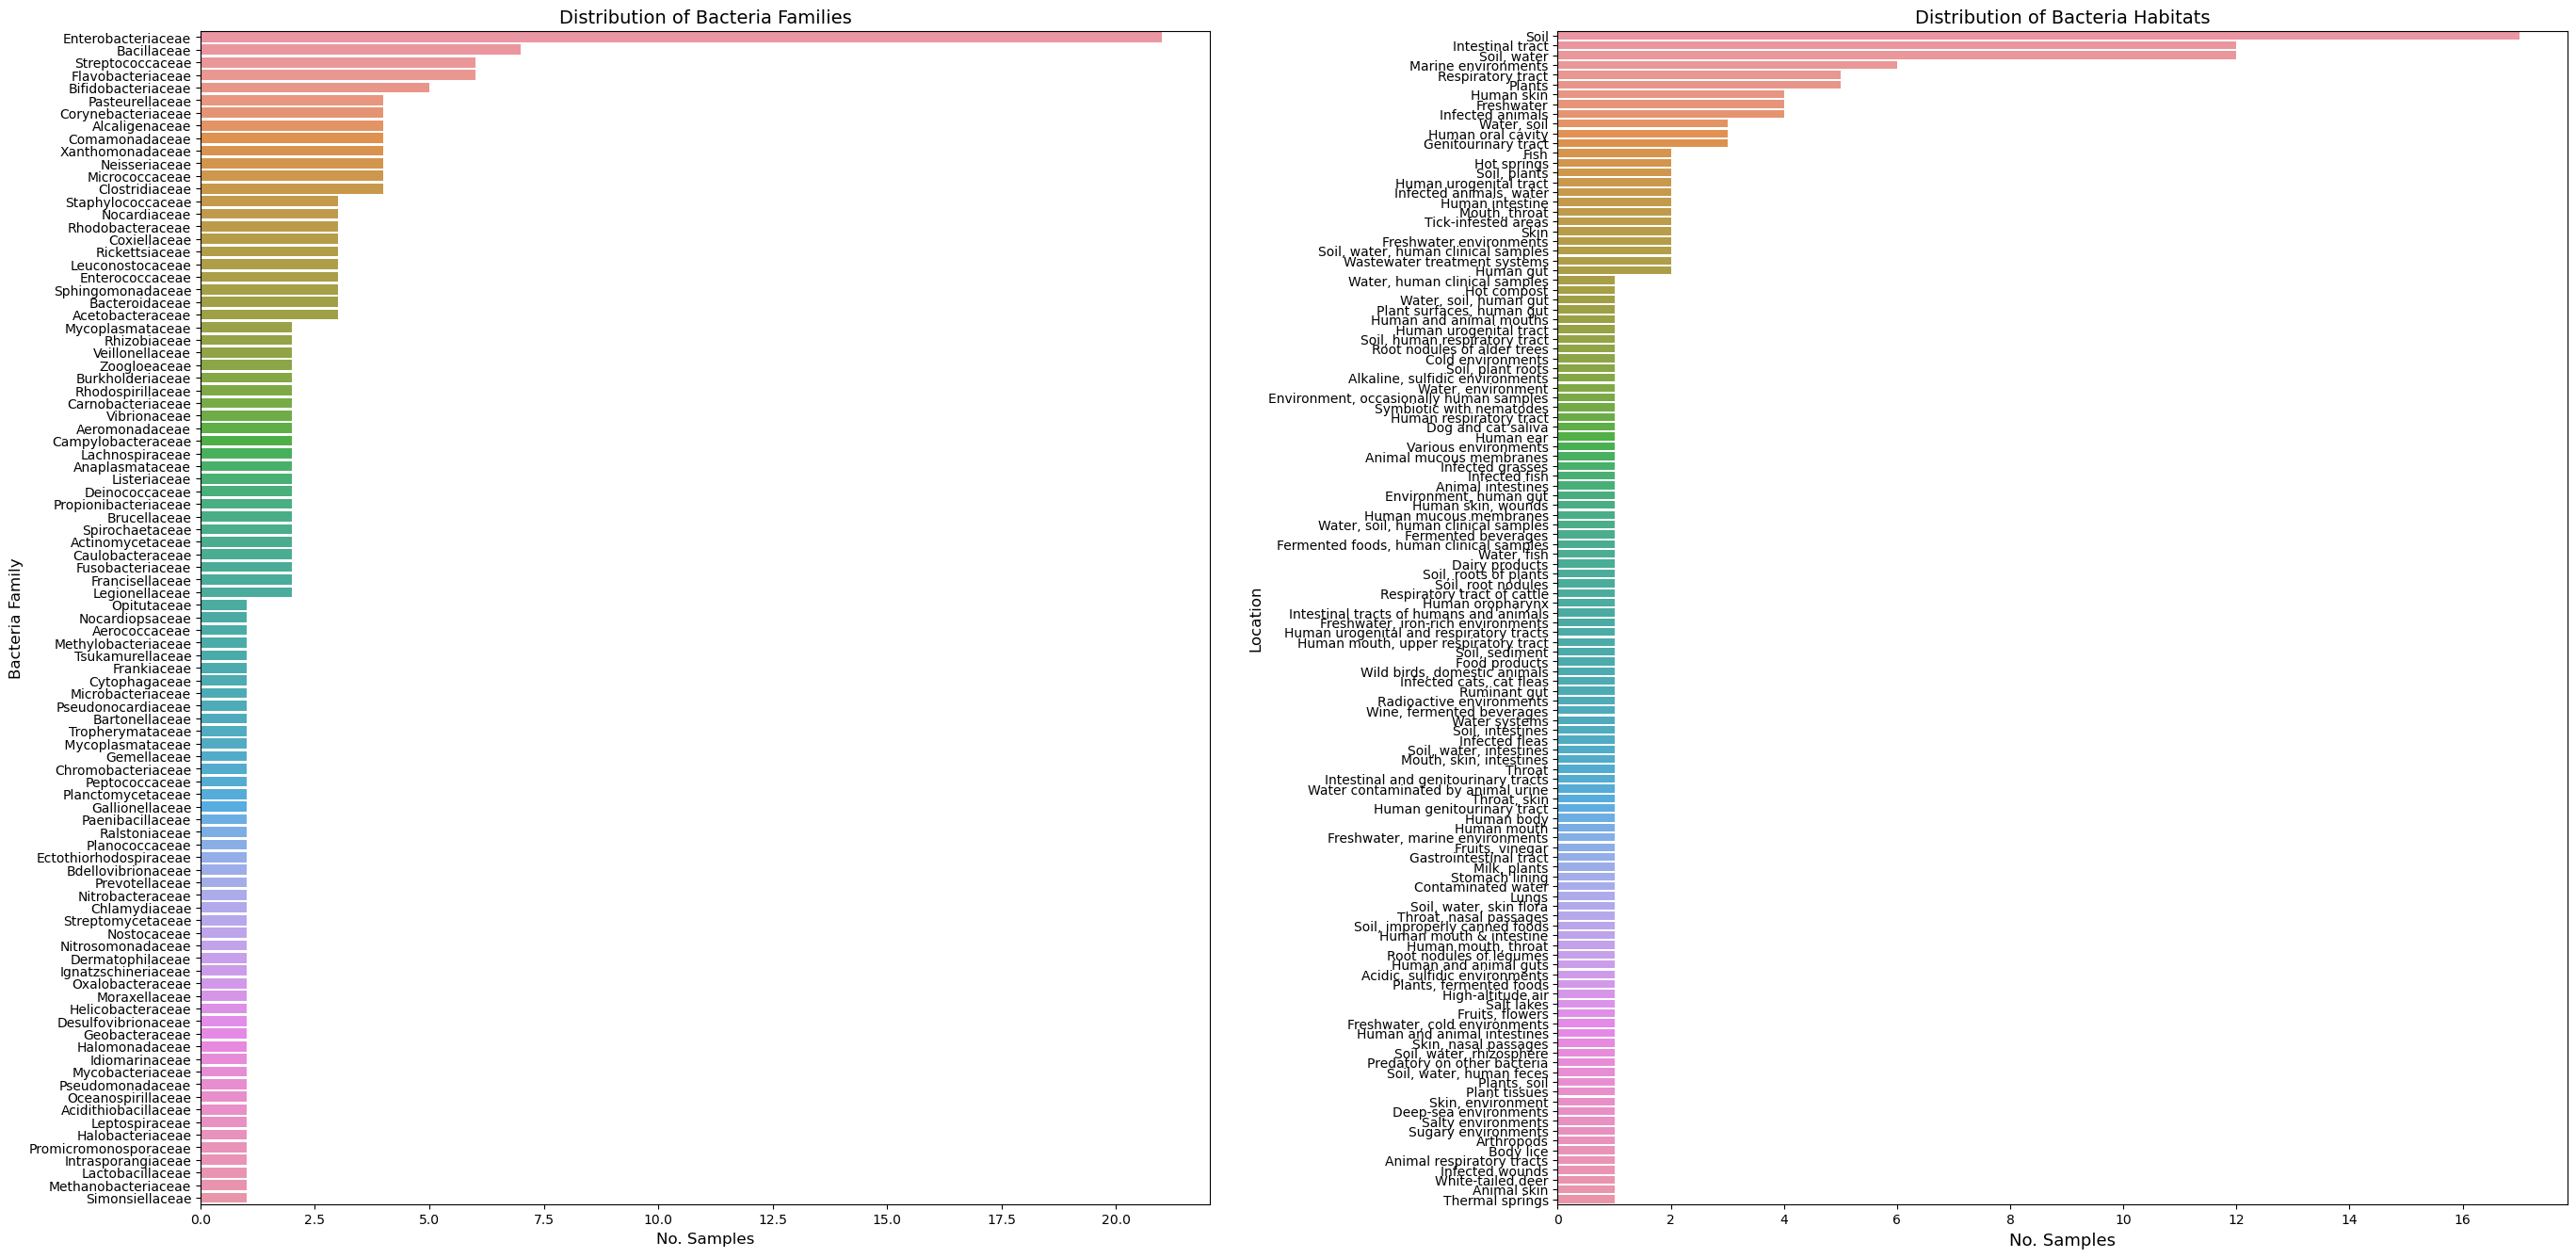

In [46]:
# EXPLORATORY DATA ANALYSIS

# setting a subplot grid with 2 columns to compare distributions next to eachother
fig, axes = plt.subplots(1, 2, figsize=(28, 14))

# analyse distribution of bacteria families
# first, count the occurrences of each family in the dataset
family_counts = data['Family'].value_counts()
# now to create a bar plot to visualise counts of each family
sns.barplot(y=family_counts.index, x=family_counts.values, ax=axes[0])
# setting plot title
axes[0].set_title('Distribution of Bacteria Families', fontsize=14)
# x axis is count of samples in family
axes[0].set_xlabel('No. Samples', fontsize=12)
# y-axis is family column
axes[0].set_ylabel('Bacteria Family', fontsize=12)

# analyse where bacteria were found
# count occurrences of each location where bacteria were found
location_counts = data['Where Found'].value_counts()
# create second bar plot for location
sns.barplot(y=location_counts.index, x=location_counts.values, ax=axes[1])
# title of plot
axes[1].set_title('Distribution of Bacteria Habitats', fontsize=14)
# label y-axis , this is the location column
axes[1].set_ylabel('Location', fontsize=12)
# label x-axis as counts of samples in each location
axes[1].set_xlabel('No. Samples', fontsize=13) 


# adjusting layout to make sure all fits without overlap
plt.tight_layout(pad=3.0)

# display plots
plt.show()


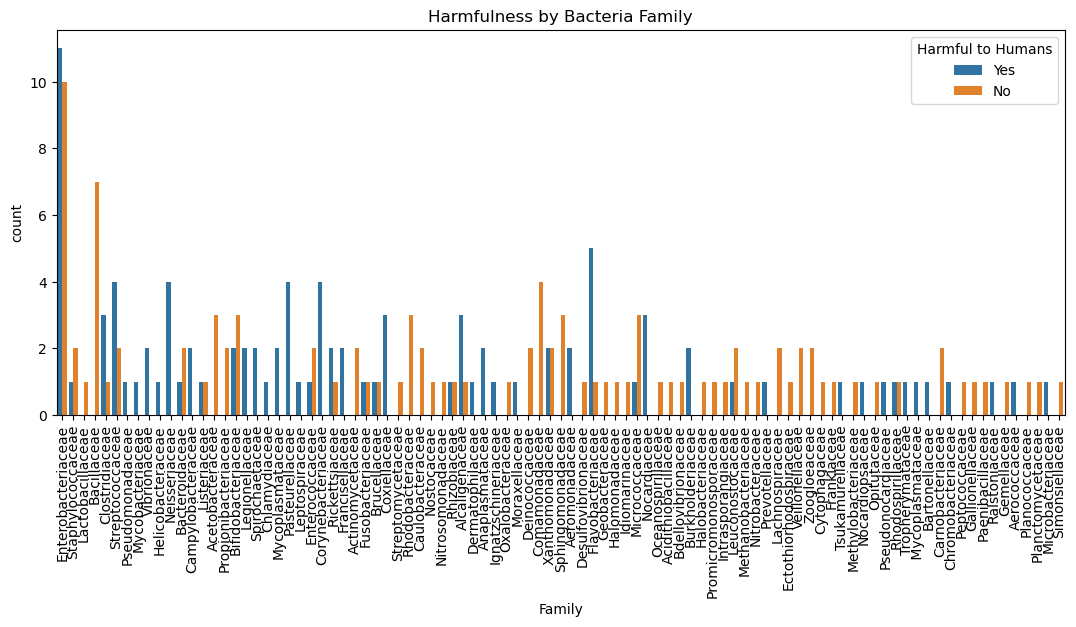

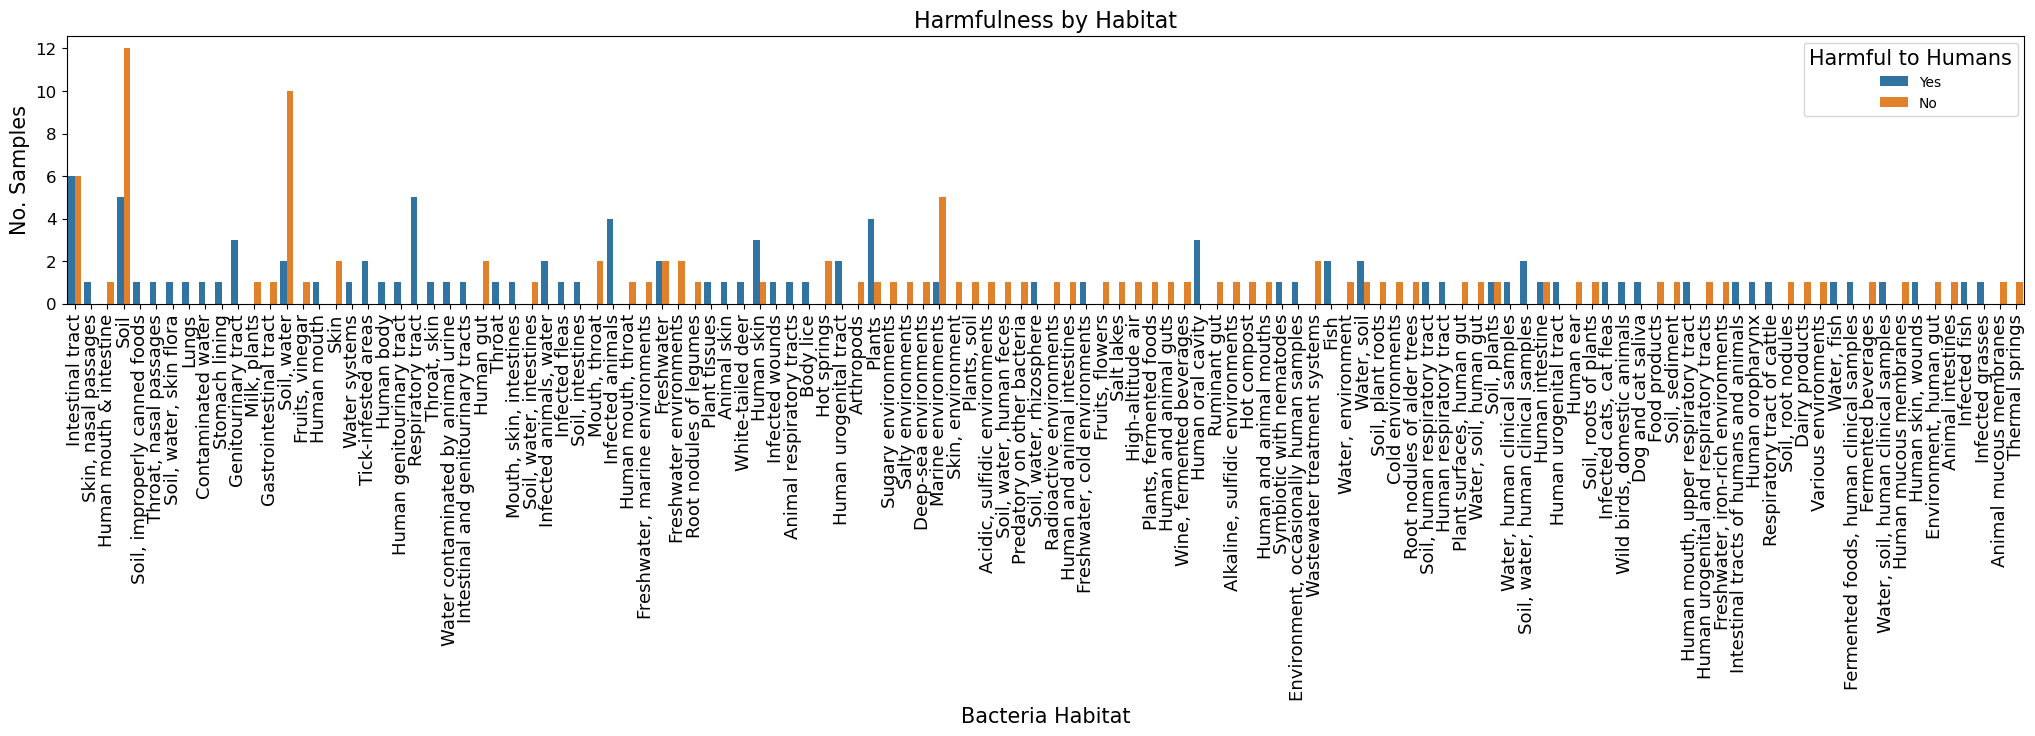

In [47]:
# visualising relationship between bacteria families and harmfulness to humans

# create figure with specified size - better readability
plt.figure(figsize=(13, 5))
# use counts plot to show distribution of harmful vs non-harmful bacteria across different families
sns.countplot(x='Family', hue='Harmful to Humans', data=data)
# title of plot 
plt.title('Harmfulness by Bacteria Family')
# rotate xaxis labels so no overlap
plt.xticks(rotation=90)
# display plot
plt.show()

# visualising relationship between bacteria habitats and their harmfulness to humans

# create larger figure for more detailed visualisation
plt.figure(figsize=(21, 8))
# use count plot to show distr of harmful vs non-harmful bacteria across different habitats
sns.countplot(x='Where Found', hue='Harmful to Humans', data=data)
# title
plt.title('Harmfulness by Habitat', fontsize=16)
# label x-axis 
plt.xlabel('Bacteria Habitat', fontsize=15)
# label y-axis 
plt.ylabel('No. Samples', fontsize=15)
# rotate the x-axis to avoid overlap
plt.xticks(rotation=90, fontsize=13)# this is so text is vertical
# adjusting size of y-axis labels
plt.yticks(fontsize=12)
# legend with title and adjusting font sizde
plt.legend(title='Harmful to Humans', title_fontsize=15)
# adjusting layout to prevent overlap
plt.tight_layout(pad=3.0)
# display plot
plt.show()


In [48]:
# Combining the categorical factors into one variable 
data['famlocation'] = data['Where Found'] + " " + data['Family']

# Define features and labels
features = data['famlocation']
labels = data['Harmful to Humans']

# Count Vectorization
count_vect = CountVectorizer()
Xcounts = count_vect.fit_transform(features)

# TF-IDF 
tftransform = TfidfTransformer(use_idf=True).fit(Xcounts)
Xtf = tftransform.transform(Xcounts)

# Label Encoding
le = LabelEncoder()
y = le.fit_transform(labels)


In [49]:
# Train-Test Split - chose 80-20 split, and a random seed 42 reproducibility
Xtrain, Xtest, ytrain, ytest = train_test_split(Xtf, y, random_state=42, train_size=0.8) 

# MODEL TRAINING

# define the 5 supervised models for performance comparison
models = {
    # random forest model with 100 set trees, random state for consistent results
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    # logistic regresson model set with a max 1000 iterations, same random state 
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42), 
    # support vector machine has linear kernel (default)
    'SVM': SVC(probability=True, kernel='linear', random_state=42), 
    # k-nearest neighbours, deterministic so dont need random state 42
    'KNN': KNeighborsClassifier(), 
    # multinomial naive bayes also deterministic
    'MNB': MultinomialNB()
}

# MODEL EVALUATION

# this will print evalulation metrics and loop each model in dictionary
for model_name, model in models.items():
    # fits model on train data
    model.fit(Xtrain, ytrain)
    # making test predictions
    ypred = model.predict(Xtest)
    # accuracy
    accuracy = accuracy_score(ytest, ypred) # calculating..
    print(f"Accuracy score for {model_name} : {accuracy:.4f}") # printing
    # print the classification Report
    print(f"Classification report for {model_name}:")
    print(classification_report(ytest, ypred, zero_division=0))
    # confusion matrix
    print(f"Confusion matrix for {model_name}:")
    print(confusion_matrix(ytest, ypred)) 
    # performing cross validation and printing results of 5 folds as well as calculating and printing mean
    skf = StratifiedKFold(n_splits=5) 
    cvvalue = cross_val_score(model, Xtf, y, cv=skf)  
    print(f"5 cross-validation folds for {model_name}: {cvvalue}")
    print(f"{model_name} Mean cv: {cvvalue.mean():.4f}\n")


Accuracy score for Random Forest : 0.7750
Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        19
           1       0.80      0.76      0.78        21

    accuracy                           0.78        40
   macro avg       0.78      0.78      0.77        40
weighted avg       0.78      0.78      0.78        40

Confusion matrix for Random Forest:
[[15  4]
 [ 5 16]]
5 cross-validation folds for Random Forest: [0.625      0.75       0.725      0.7        0.82051282]
Random Forest Mean cv: 0.7241

Accuracy score for Logistic Regression : 0.8000
Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.84      0.76      0.80        21

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80   

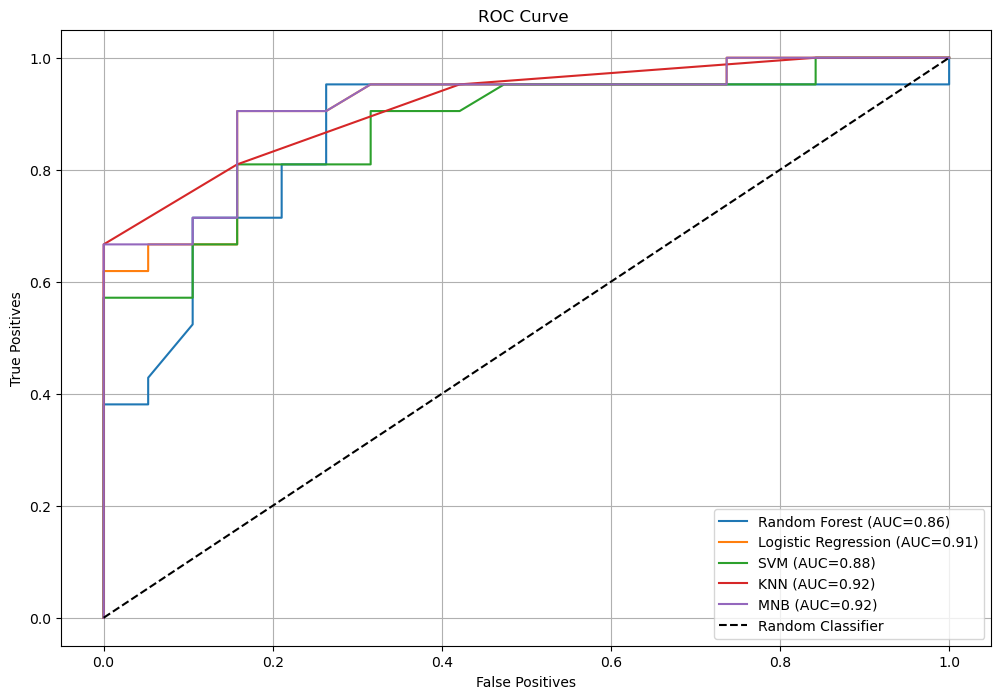

In [51]:
# Time to plot ROC curves with AUC scores for the models

# adjusting figure size for readability
plt.figure(figsize=(12, 8))
# looping all models to fit and plot roc curves
for model_name, model in models.items():
    # training model
    model.fit(Xtrain, ytrain)
    # predict probabilities for +ve class
    yproba = model.predict_proba(Xtest)[:, 1]
    # computing ROC curve values
    fpr, tpr, _ = roc_curve(ytest, yproba)
    # auc score calculation
    roc_auc = auc(fpr, tpr)
    # plotting ROC curve with auc score labelled
    label ='%s (AUC=%.2f)' % (model_name, roc_auc)
    plt.plot(fpr, tpr, label=label)

# adding diagonal line for a random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # to compare to other curves

# labels, title, legend, grid - better readibility
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC Curve ')
plt.legend(loc='best')
plt.grid(True)
# plot display
plt.show()

In [54]:
# MODEL OPTIMISATION

# defining the parameter grids for hyperparameter tuning the models
param_grids = {
    'Random Forest': {
        # no trees in forest
        'n_estimators': [50, 100, 150, 200, 250], 
        # max depth of trees
        'max_depth': [None, 10, 20, 30, 40, 50],
        # min no samples to split node:
        'min_samples_split': [2, 5, 10],
        # min no samples at leaf 
        'min_samples_leaf': [1, 2, 4], 
        # sampling with replacement or not?
        'bootstrap': [True, False]
    },
    'Logistic Regression': {
         # c - regularisation strength
        'C': [0.01, 0.1, 1, 10, 100],
        # which optimisation algorithm?
        'solver': ['liblinear', 'saga'], 
        # regularisation type
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'max_iter': [100, 200, 300] # the maximum no of iterations to go
    },
    # support vector machine
    'SVM': {
        # regularisation (like logistic regression)
        'C': [0.01, 0.1, 1, 10, 100], 
        # kernel type?
        'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 
        # kernel coefficient
        'gamma': ['scale', 'auto'],
        # degree used if the kernel is poly only
        'degree': [2, 3, 4]  
    },
    # k-nearest neighbours
    'KNN': {
        # this will determine number of neighbours (odd numbers)
        'n_neighbors': [3, 5, 7, 9, 11], 
        # weight for prediction
        'weights': ['distance', 'uniform'],
        # types of algorithms for computing nearest neighbours
        'algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute'],
        'p': [1, 2]  # 1 - manhattan distance and 2 - euclidean distance
    },
    # multinomial naive bayes
    'MNB': { 
        # smoothing
        'alpha': [0.01, 0.1, 1, 10],
        # learn class prior or use uniform?
        'fit_prior': [False, True]
    }
}

# setting gridsearchcv for all the models, this will find best parameters to use
best_models = {}
for mname, model in models.items():
    print(f"Running GridSearchCV for {mname}...")
    # getting parameter grid for current model
    param_grid = param_grids[mname]
    # using gridsearchcv 
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    # fitting model on training data
    grid_search.fit(Xtrain, ytrain)
    # saves the best model found through the search
    best_models[mname] = grid_search.best_estimator_
    print(f"Best Parameters for {mname}: {grid_search.best_params_}")

Running GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 250}
Running GridSearchCV for Logistic Regression...
Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}
Running GridSearchCV for SVM...
Best Parameters for SVM: {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Running GridSearchCV for KNN...
Best Parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Running GridSearchCV for MNB...
Best Parameters for MNB: {'alpha': 1, 'fit_prior': True}


In [56]:
# print all scores for fine-tuned models

# Evaluate the models
for model_name, model in best_models.items():
    # training the model
    model.fit(Xtrain, ytrain)
    # test predictions
    ypred = model.predict(Xtest)
    # fine-tuned accuracy printing
    accuracy = accuracy_score(ytest, ypred)
    print(f"Test Accuracy for {model_name}: {accuracy:.4f}")
    # calculating cv score along with mean
    cvscores = cross_val_score(model, Xtrain, ytrain, cv=5, scoring='accuracy')
    print(f"cv scores for {model_name}: {cvscores}")
    print(f"mean cv for {model_name}: {cvscores.mean():.4f}")
    print()

Test Accuracy for Random Forest: 0.8000
cv scores for Random Forest: [0.875      0.75       0.78125    0.65625    0.77419355]
mean cv for Random Forest: 0.7673

Test Accuracy for Logistic Regression: 0.8000
cv scores for Logistic Regression: [0.8125     0.75       0.75       0.6875     0.77419355]
mean cv for Logistic Regression: 0.7548

Test Accuracy for SVM: 0.7500
cv scores for SVM: [0.875      0.75       0.78125    0.75       0.77419355]
mean cv for SVM: 0.7861

Test Accuracy for KNN: 0.8500
cv scores for KNN: [0.8125     0.78125    0.71875    0.71875    0.67741935]
mean cv for KNN: 0.7417

Test Accuracy for MNB: 0.8250
cv scores for MNB: [0.84375    0.75       0.71875    0.65625    0.77419355]
mean cv for MNB: 0.7486



Random Forest AUC Score: 0.8434
Logistic Regression AUC Score: 0.8684
SVM AUC Score: 0.7669
KNN AUC Score: 0.9211
MNB AUC Score: 0.9160


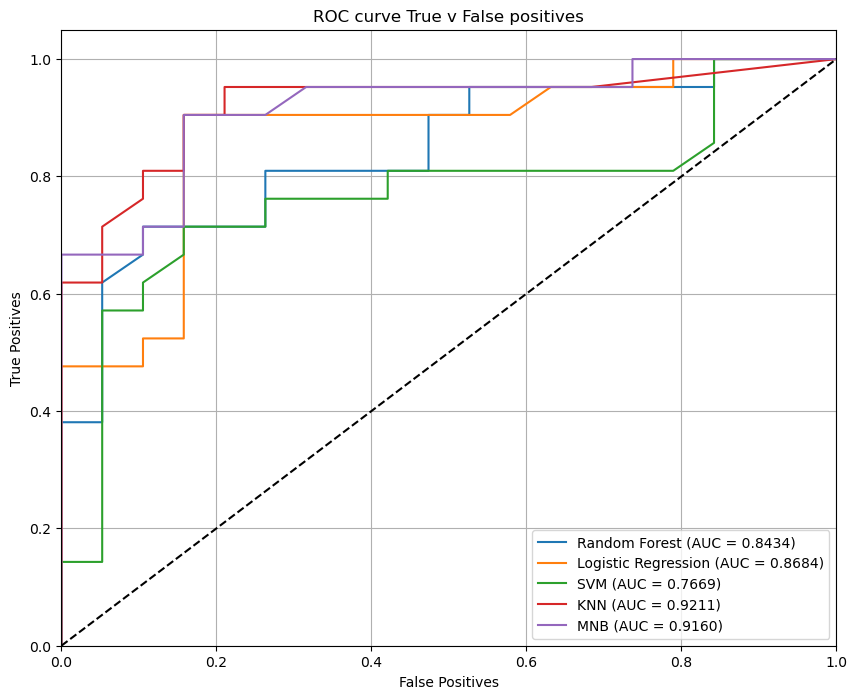

In [57]:
# ROC curve and AUC results. will compare this to initial models

# Dictionary to keep track of ROC results
roc_results = {}

# looping through models for evaluation
for model_name, model in best_models.items():
    # model training
    model.fit(Xtrain, ytrain)
    
    # test predicting
    ypred = model.predict(Xtest)

    # predicting probabilities/ decision function scores
    if hasattr(model, "predict_proba"):
        yprob = model.predict_proba(Xtest)[:, 1]
    else:  
        yprob = model.decision_function(Xtest)
    
    # ROC and AUC score calculations
    fpr, tpr, _ = roc_curve(ytest, yprob)
    auc = roc_auc_score(ytest, yprob)
    
    # storing the results
    roc_results[model_name] = (fpr, tpr, auc)
    
    # AUC score print!
    print(f"{model_name} AUC Score: {auc:.4f}")

# ROC curve plotting
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.4f})')

# ROC curve aesthetics to make clearer    
plt.plot([0, 1], [0, 1], 'k--') # diagonal line (random classifier)
# limits
# x goes from 0 to 1
plt.xlim([0.0, 1.0])
# y goes from 0 to 1.05
plt.ylim([0.0, 1.05])
# labelling
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.title('ROC curve True v False positives')
plt.legend(loc='lower right')
plt.grid()
# plot display
plt.show()